### 2.2 Question 2
To implement a linear regression model, we will be using a toy dataset to
ensure we’ve implemented the model correctly. To begin with this lab, we will
want to download the boston dataset from:

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html.

Download and save the dataset
exactly as it is, and save it as a CSV.
After we’ve downloaded the CSV file, we will want to parse and load the
data into a pandas DataFrame.
Create a load_boston_data(filepath: str) -> pd.DataFrame function.
This may require iterating through each line in the file until you read the
data, at this point you will need to parse the data. Finally, return the data
as a dataframe.

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 **Variables in order:**
 
  **- CRIM**     per capita crime rate by town.
  
  **- ZN**       proportion of residential land zoned for lots over 25,000 sq.ft.
  
  **- INDUS**    proportion of non-retail business acres per town.
  
  **- CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
  
  **- NOX**      nitric oxides concentration (parts per 10 million).
  
  **- RM**       average number of rooms per dwelling.
  
  **- AGE**      proportion of owner-occupied units built prior to 1940.
  
  **- DIS**      weighted distances to five Boston employment centres.
  
  **- RAD**      index of accessibility to radial highways.
  
  **- TAX**      full-value property-tax rate per $\$$10,000.
  
  **- PTRATIO**  pupil-teacher ratio by town.
  
  **- B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
  
  **- LSTAT**    $\%$ lower status of the population.
  
  **- MEDV**     Median value of owner-occupied homes in $1000's.
  

In [1]:
"""
Instead of creating a .csv file, a .txt file was created, 
because it allows to treat the dataset as a long string of characters,
that help me to simplify the code by a regular expression over the whole text 
without the need to interact on the rows one by one looking for numbers.
"""

# First we create an object that allows us to open the data frame that was saved as a text file .txt file
# and store it in the variable "fileObject".
fileObject = open("data.txt", "r")

# We then read the data from the object and store it in the variable "text" of type str.
text = fileObject.read()

In [2]:
# The regular expressions module is imported to allow us to clean the "text" variable.
import re

# Next we create a regular expression that will allow us to identify each of the numerical values in the variable "text".
number_regex = re.compile(r'\d+\.*\d*')

# And we create a list that stores all the numerical data found using the regular expression
list_1 = number_regex.findall(text)


In [3]:
# As we know from the documentation the dataframe has 506 observations and 14 variables
# all of them at the end of the text variable.
# Therefore all the first numbers in the variable "list_1" are not part of the dataframe.
# so we proceed to section the numbers that are only part of the data to be manipulated.
# this is done by subtracting the length of the variable "list_1" minus the amount of data in the dataframe(506*14)
# and this is stored again in the list variable.

data = len(list_1) - 506*14
list_1 = list_1[data:]

In [4]:
# To facilitate the construction of the dataframe we import numpy and create an np.array 
# to transform this data into a new array of 506 observations and 14 variables.
import numpy as np
arr = np.array(list_1)
new_arr = arr.reshape(506, 14)

# After that, these variables are transformed from str to float.
new_arr = new_arr.astype(np.float64)

In [5]:
# Using pandas we create a dataframe making use of the transformed np.array created above
# and assign the columns according to what is written in the dataframe documentation.

import pandas as pd
variables = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
             'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(new_arr, columns = variables)

# The first 5 rows of the data frame are displayed.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Se verfifica que el tamaño del dataframe sea el correcto
df.shape

(506, 14)

In [7]:
# Based on the documentation, we create a list of predictor variables.
predictors = ['CRIM','ZN','INDUS','CHAS','RM','AGE','DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# To separate them into a separate dataframe "X".
X = df[predictors]

# We do the same for the response variable "MEDV".
y = df['MEDV']


### 2.3 Question 3
Visualise some scatter plots of the columns of your choice against the target
house price column (i.e. the column of your choice will be on the x-axis, will
house price will be the y-axis).
Decide what you think will be the singular best column to use for using
a linear model to predict the house price.
What is this column?

In [8]:
# To facilitate the identification of which variables are the best to generate our linear regression model.
# We generate a correlation matrix between the variables.
round(df.corr(),3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


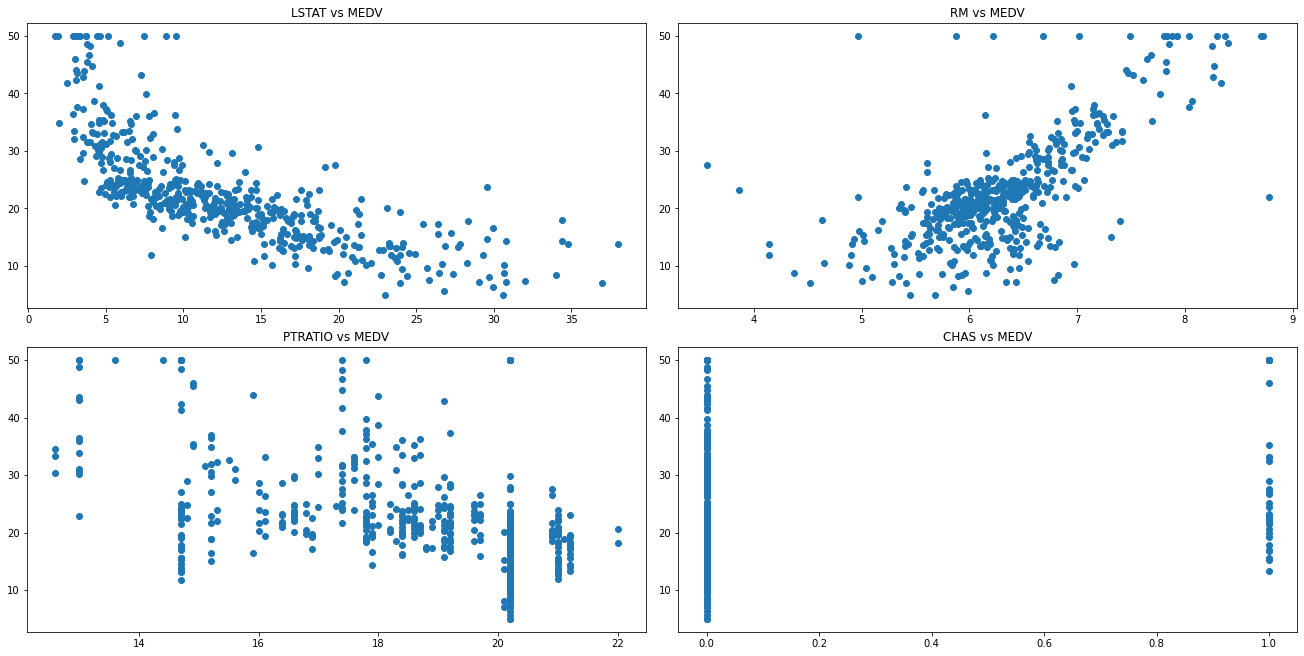

In [9]:
# The 3 variables that have the strongest positive and negative relationship 
# with respect to the response variable are chosen to be plotted.
# as well as a variable that is not well correlated (CHAS) against the response varaible (MEDV).

import matplotlib.pyplot as plt
varibles_to_plot = ['LSTAT', 'RM', 'PTRATIO', 'CHAS']

fig, axs = plt.subplots(2, 2, figsize=(18, 9), constrained_layout=True)
for ax, variable in zip(axs.flat, varibles_to_plot):
    ax.set_title("{0} vs {1}".format(variable, 'MEDV'))
    ax.scatter(df[variable], y)

The variable that best explains the behavior of **MEDV** house prices is **LSAT** the % lower status of the population

### 2.4 Question 4
Create a function called lm, that takes an x, and y, and returns the random m and b variables in the linear equation

In [10]:
# For this point the random library is imported and assigned to a seed so that the result is repeatable.
# This function will generate a random number between -10 and 10, for both b and m.
import random
random.seed(42)

def lm(x, y):
    # create random m, b
    
    m = 20.0 * (random.random()-0.5)
    b = 20.0 * (random.random()-0.5)
    return m, b

m, b = lm(X, y)

print('The random value assigned for m is {0} and for b is {1}'.format(m, b))

The random value assigned for m is 2.788535969157675 and for b is -9.49978489554666


### 2.5 Question 5
Using these m, b variables, create a housing price prediction for each row of
data.

In [11]:
# For this point in the dataframe new columns are added with the results of the predictions made by the model created. 
# The new columns will be called ypred_ + the name of the predictor variable. 

for predictor in predictors:
    
    df['ypred_'+ predictor] = m * df[predictor] + b

df.iloc[:,14:26]

,ypred_CRIM,ypred_ZN,ypred_INDUS,ypred_CHAS,ypred_RM,ypred_AGE,ypred_DIS,ypred_RAD,ypred_TAX,ypred_PTRATIO,ypred_B,ypred_LSTAT
0,-9.482161,40.693863,-3.058267,-9.499785,8.834839,172.312760,1.905327,-6.711249,815.906862,33.164815,1097.270141,4.387124
1,-9.423630,-9.499785,10.215164,-9.499785,8.405405,210.515703,4.351152,-3.922713,665.325920,40.136155,1097.270141,15.987434
2,-9.423686,-9.499785,10.215164,-9.499785,10.535846,160.879763,4.351152,-3.922713,665.325920,40.136155,1085.920800,1.738015
3,-9.409520,-9.499785,-3.420776,-9.499785,10.014390,118.215162,7.404878,-1.134177,609.555200,42.645838,1090.940165,-1.301489
4,-9.307236,-9.499785,-3.420776,-9.499785,10.429882,141.638865,7.404878,-1.134177,609.555200,42.645838,1097.270141,5.363112
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-9.325139,-9.499785,23.767449,-9.499785,8.885033,183.188051,-2.588120,-6.711249,751.770535,49.059470,1083.578430,17.465358
502,-9.373548,-9.499785,23.767449,-9.499785,7.566055,204.380924,-3.121009,-6.711249,751.770535,49.059470,1097.270141,15.820122
503,-9.330353,-9.499785,23.767449,-9.499785,9.953042,244.256988,-3.455633,-6.711249,751.770535,49.059470,1097.270141,6.227558
504,-9.194189,-9.499785,23.767449,-9.499785,9.445528,239.516477,-2.838251,-6.711249,751.770535,49.059470,1087.649692,8.569928


### 2.6 Question 6
Create a function mae that calculate the mean absolute error of the true
house price value and the predicted value. What is the error?

We know that MAE is given by:

$$MAE = \frac{1}{n}\sum_{i=1}^{n}\left |y_{i}- \hat{y}_{i}\right |$$

In [12]:
def mae(y, y_pred):
    
    
    """
    This function calculates the MAE for a simple linear regression.
    
    """
    abs_difference = np.absolute(np.array(y) - np.array(y_pred)) # 
    result = abs_difference.sum()/len(y)
    
    return result

mae_1 = mae(y, df['ypred_LSTAT'])
mae_1

21.696740568521435

The MAE given by the linear regression based on a slope and a random intercept is **21.69**.

### 2.7 Question 7
Visualise the linear model returned from lm on top of the scatter plot of the
input and target data.


Text(0.5, 0, 'LSTAT')

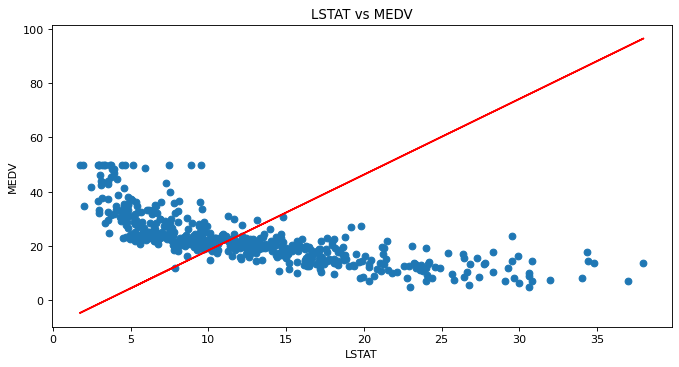

In [13]:

# A linear regression model is created using the previously calculated m and b 
linear_regression = b + m*df['LSTAT']


# and the regression results are displayed graphically.
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(df['LSTAT'],y)
plt.plot(df['LSTAT'], linear_regression, color='r')
plt.title("LSTAT vs MEDV")
plt.ylabel("MEDV")
plt.xlabel("LSTAT")

### 2.8 Question 8
Re-make the lm function. This time, when called with an x, y it returns
the optimal m and b.
You are free to either implement least-squares regression, or the gradient
descent method.

The simple linear regression model algorithm as mentioned above has only one explanatory or covariate in relation to a response variable, its general model being defined by:


$$ y = B_{0}+ B_{1}x $$


Where $B_{0}$ is the ordinate at the origin, $B_{1}$ is the slope that accompanies $x$, these are the so-called **regression coefficients** in addition to a zero mean error, unknown variance and unrelated to each other.

To estimate the values of $B_{0}$ and $B_{1}$ we use the method of least squares, i.e. the distance between the observations is minimum, that is:

$$S\left(B_{0},B_{1}\right)=\sum _{i=1}^n\:\left(y_i-B_{0}-B_{1}x_{i}\right)^2$$

Where:

$$\bar{y}=\frac{1}{n}\sum _{i=1}^n\:\left(y_i\right)$$  

with 

$$\bar{x}=\frac{1}{n}\sum _{i=1}^n\:\left(x_i\right)$$


For the estimators, by least squares, of $B_{0}$ and $B_{1}$, they are designated as $\hat{B}_{0}$ and $\hat{B}_{1}$:

$$\hat{B}_1=\frac{\sum_{i=1}^n\left(y_ix_i\right)-\frac{\sum _{i=1}^n\left(y_i\right)\cdot\sum_{i=1}^n\:\left(x_i\right)}{n}}{\sum_{i=1}^nx^2-\frac{\left(\sum_{i=1}^n\left(x_i\right)\right)^2}{n}}$$

Simplifying:

$$\hat{B_1}\:=\:\frac{S_{xy}}{S_{xx}}\:=\:\frac{\sum \:_{i=1}^n\:y_i\left(x_i-\bar{x}\right)\:}{\sum _{i=1}^n\:\left(x_i-\bar{x}\right)^2\:\:}$$

Now that we have $\hat{B}_1$, we will calculate $\hat{B}_0$.

$$\hat{B}_0=\bar{y}-\hat{B}_1\bar{x}$$


In [14]:
def lm(x, y):
    
    """
    This function performs the calculation of a simple linear regression
    using the least squares method to calculate Bo and B1.
    
    
     y_hat = B0 + B1*X
    
    """
    
    x = np.array(x)
    y = np.array(y)
    
    x_mean = x.mean()
    y_mean = y.mean()
    
    Sxx = np.power((x-x_mean),2).sum()
    Sxy = (y*(x-x_mean)).sum()

    B1 = Sxy/Sxx

    B0 = y_mean - B1*x_mean

    b = B0
    m = B1
    
    return m, b


### 2.9 Question 9
Re-plot this linear model against the scatter plot.

Text(0.5, 0, 'LSTAT')

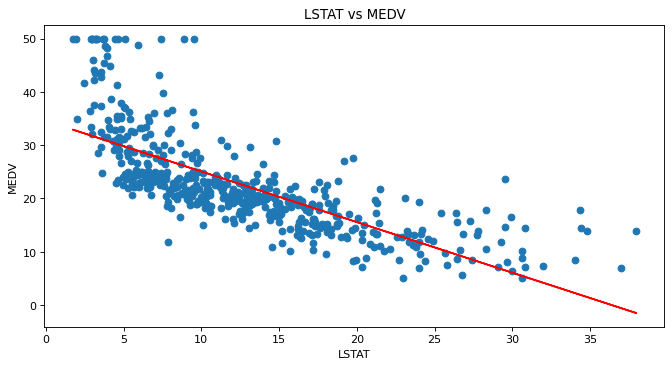

In [15]:
# Call the function performed by the least squares method 

m, b = lm(df['LSTAT'], y)
y_pred = list(b + m*df['LSTAT'])

# and the regression result against the data is plotted.

plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(df['LSTAT'],y)
plt.plot(df['LSTAT'], y_pred, color='r')
plt.title("LSTAT vs MEDV")
plt.ylabel("MEDV")
plt.xlabel("LSTAT")

Based on these criteria we can say that:

$$MDEV = -0.95 * LSTAT + 34.55$$.

We can say that the average price of occupied houses in thousands of dollars decreases $-0.95$ units, for each increase of one unit for each value the $\%$ lower status of the population. increases.

If the $\%$ lower status of the population is zero, the median value of the houses is close to  $\$34550$.

### 2.10 Question 10
Re-calculate the mean absolute error for these optimal m, b variables. What
is the error now?

In [16]:
# MAE function is called to check the new value of the error calculated by the least squares method.
mae_2 = mae(y, y_pred)
mae_2

4.505281166250568

The MAE given by the linear regression using least squares is **4.50**